In [2]:
#%pip install numpy matplotlib
#Importamos las librerias necesirias
from functions import gaussianRandom as gss
from sort import MergeSort
from sort import BubbleSort
from sort import QuickSort

import matplotlib.pyplot as plt

In [3]:
data = gss(50000)

In [4]:
# Visualización de algunos valores
data[:10]

[-0.2395468779831672,
 -0.9033618368987788,
 0.7411900410484428,
 -0.18369016587992582,
 -0.7220344706214651,
 0.061472307939259785,
 -0.9265798028856999,
 0.004661717109875643,
 0.7060608440054706,
 0.9967577070869029]

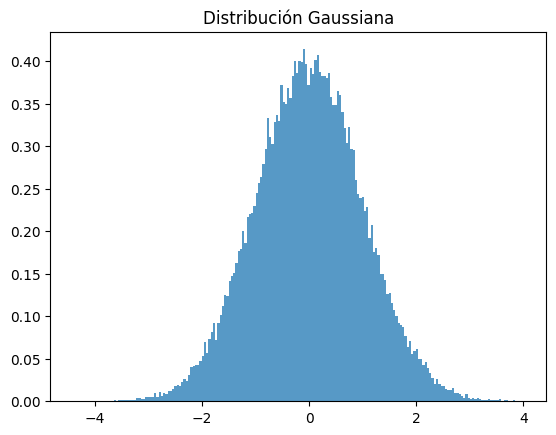

In [5]:
# Visualizar Gráficamente la distribución gaussiana
plt.hist(data, bins=200, density=True, alpha=0.75)
plt.title('Distribución Gaussiana')
plt.show()

In [6]:
th2_merge_sort = MergeSort(threads=2).run(data)
th2_merge_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [7]:
th4_merge_sort = MergeSort(threads = 4).run(data)
th4_merge_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [8]:
th6_merge_sort = MergeSort(threads=6).run(data)
th6_merge_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [9]:
th2_quick_sort = QuickSort(threads = 2).run(data)
th2_quick_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [10]:
th4_quick_sort = QuickSort(threads = 4).run(data)
th4_quick_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [11]:
th2_bubble_sort = BubbleSort(threads = 2).run(data)
th2_bubble_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [12]:
th4_bubble_sort = BubbleSort(threads = 4).run(data)
th4_bubble_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [13]:
th6_bubble_sort = BubbleSort(threads = 6).run(data)
th6_bubble_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [14]:
th12_bubble_sort = BubbleSort(threads = 12).run(data)
th12_bubble_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [15]:
merge_sort = MergeSort().run(data)
merge_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [16]:
quick_sort = QuickSort().run(data)
quick_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]

In [17]:
bubble_sort = BubbleSort().run(data)
bubble_sort[:20]

[-4.406707517601435,
 -4.1783910123193255,
 -4.072737299182859,
 -4.029472219914315,
 -3.8638296434463095,
 -3.827572151449243,
 -3.805049051487699,
 -3.7504031170614875,
 -3.7324803782630775,
 -3.64749353229078,
 -3.633301543352658,
 -3.5983434729110484,
 -3.532603457368388,
 -3.5256945221882776,
 -3.4940507150454962,
 -3.484221902533988,
 -3.472110171173457,
 -3.4590089831207704,
 -3.4096077332391843,
 -3.4072151577255103]